                         
                         BALIKESİR BELEDİYESİ İLAÇLAMA-YEŞİL ALAN UYGULAMASI
     
     
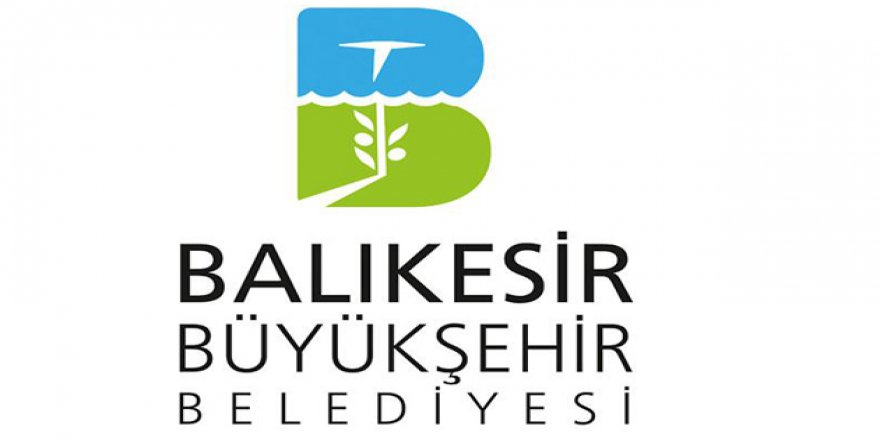






**DATASET : https://acikveri.balikesir.bel.tr/Veriler/VeriSetiTabloGorunum?vsadi=ilaclama-yesilalan**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns



# Veri Seti

In [2]:
data=pd.read_csv('Balikesirilac.csv',sep=';')
data.head(-10)

,İlçe Adı,Yıl,Ay,Uygulama Sayısı
0,EDREMİT,2018,2,1
1,BALYA,2018,2,1
2,AYVALIK,2018,2,1
3,BANDIRMA,2018,1,15
4,ALTIEYLÜL,2018,1,1
...,...,...,...,...
197,ALTIEYLÜL,2016,5,135
198,EDREMİT,2016,5,37
199,BİGADİÇ,2016,5,35
200,GÖNEN,2016,5,420


In [5]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
Yıl,212.0,2016.570755,0.559022,2016.0,2016.00,2017.0,2017.00,2018.0
Ay,212.0,7.188679,2.377275,1.0,5.75,7.0,9.00,12.0
Uygulama Sayısı,212.0,120.462264,226.093181,1.0,5.00,28.5,117.75,1573.0


In [152]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter3d(
    x=data['Yıl'],
    y=data['Ay'],
    z=data['Uygulama Sayısı'],
    text=data['İlçe Adı'],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=25,
        size=data['Uygulama Sayısı'],
        color = data['Uygulama Sayısı'],
        colorscale = 'Viridis',
        colorbar_title = 'Uygulama<br>Sayısı',
        line_color='rgb(140, 140, 170)'
    )
))


fig.update_layout(height=800, width=800,
                  title='Balıkesir B.B Verilerine Göre Yeşil Alan İlaçlama')

fig.show()

In [97]:
fig = px.pie(data, values='Uygulama Sayısı', names='İlçe Adı', title='İlçelere Göre Yeşil Alan İlaçlama',
            hover_data=['Uygulama Sayısı'], labels={'İlçe Adı':'İlçe Adı'})
fig.show()

* En çok Altıneylül ilçesinde(%28.5) ilaçlanma yapılmıştır.

In [166]:
fig = px.bar(data, x='İlçe Adı', y='Ay',title="Yıllara Göre Yeşil Alan İlaçlama",color='Yıl')
fig.show()

In [119]:

fig = px.box(data, x="Ay",y="Uygulama Sayısı",color='Yıl')
fig.update_traces(quartilemethod="inclusive")
fig.show()

In [58]:
fig = px.scatter(data, x="Ay", y="Uygulama Sayısı",size="Yıl",color='İlçe Adı',
                 hover_name="Ay", log_x=1)

fig.show()


In [62]:
fig = px.histogram(data, x="Ay", y="Uygulama Sayısı",color='İlçe Adı', marginal="box",
                   hover_data=data.columns)
fig.show()

In [109]:
fig = px.scatter(data, x="Ay", y="Uygulama Sayısı", animation_frame="Yıl", animation_group="İlçe Adı",
           size="Yıl", color="İlçe Adı", hover_name="İlçe Adı",
           log_x=True, size_max=20, range_x=[1,12], range_y=[-50,250])

fig["layout"].pop("updatemenus")
fig.show()

* Ortalama 120 kez ilaçlama yapılmıştır.

* Genellikle yılın temmuz ayında ilaçlama yapılmıştır.

* 2017 yılı en çok yeşil alanda böcek görülen yıl olmuş.

# İlçe Bazlı Ayrıma

## 1. EDREMİT

In [51]:
is_edremit=data['İlçe Adı']=='EDREMİT'
EDREMİT = data[is_edremit]
EDREMİT

,İlçe Adı,Yıl,Ay,Uygulama Sayısı
0,EDREMİT,2018,2,1
6,EDREMİT,2018,1,2
18,EDREMİT,2017,10,6
31,EDREMİT,2017,9,200
51,EDREMİT,2017,8,538
63,EDREMİT,2017,7,396
76,EDREMİT,2017,6,84
92,EDREMİT,2017,5,29
105,EDREMİT,2017,4,17
113,EDREMİT,2017,2,1


In [159]:
fig = px.pie(EDREMİT, values='Uygulama Sayısı', names='Yıl', title='Edremit İlçesinin Yıllara Göre Yeşil Alan İlaçlama',
            hover_data=['Uygulama Sayısı'], labels={'Yıl':'Yıl'})
fig.show()
fig = px.pie(EDREMİT, values='Uygulama Sayısı', names='Ay', title='Edremit İlçesinin Aylara Göre Yeşil Alan İlaçlama',
            hover_data=['Uygulama Sayısı'], labels={'At':'Ay'})
fig.show()

* Edremitte % 54.3 oran ile en çok ilaçlama 2016 yılında yapılmıştır.

**En çok ilaçlama yapılan aylar**

1. Ağustos

2. Temmuz

3. Haziran

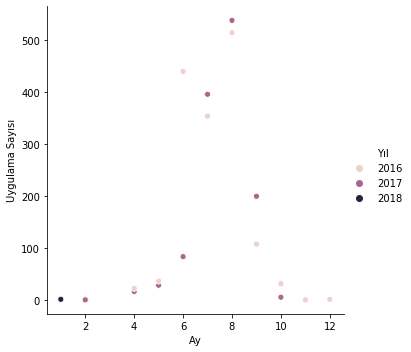

In [7]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 19,8.27
sns.relplot(x="Ay", y="Uygulama Sayısı",hue="Yıl", data=EDREMİT);


In [110]:
import plotly.express as px
fig = px.scatter(EDREMİT, x="Ay", y="Uygulama Sayısı",size="Yıl",color='Yıl',
                 hover_name="Ay", log_x=1,title='Aylara Göre Uygulama Sayısı')
fig.show()

## 2. BANDIRMA

In [10]:
isx=data['İlçe Adı']=='BANDIRMA'
BANDIRMA = data[isx]
BANDIRMA

,İlçe Adı,Yıl,Ay,Uygulama Sayısı
3,BANDIRMA,2018,1,15
8,BANDIRMA,2017,12,9
17,BANDIRMA,2017,10,12
37,BANDIRMA,2017,9,24
53,BANDIRMA,2017,8,66
65,BANDIRMA,2017,7,89
85,BANDIRMA,2017,6,50
89,BANDIRMA,2017,5,4
116,BANDIRMA,2016,12,1
121,BANDIRMA,2016,11,14


In [163]:
fig = px.pie(BANDIRMA, values='Uygulama Sayısı', names='Yıl', title='Bandırma İlçesinin Yıllara Göre Yeşil Alan İlaçlama',
            hover_data=['Uygulama Sayısı'], labels={'Yıl':'Yıl'})
fig.show()
fig = px.pie(BANDIRMA, values='Uygulama Sayısı', names='Ay', title='Bandırma İlçesinin Aylara Göre Yeşil Alan İlaçlama',
            hover_data=['Uygulama Sayısı'], labels={'At':'Ay'})
fig.show()

* Bandırma'da % 78.9 oran ile en çok ilaçlama 2016 yılında yapılmıştır.

**En çok ilaçlama yapılan aylar**

1. Ağustos

2. Temmuz

3. Mayıs

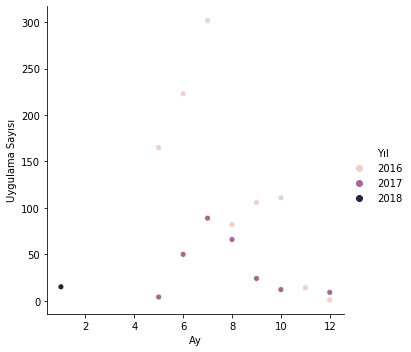

In [11]:
sns.relplot(x="Ay", y="Uygulama Sayısı",hue="Yıl", data=BANDIRMA);

In [12]:

fig = px.scatter(BANDIRMA, x="Ay", y="Uygulama Sayısı",size="Yıl",color='Yıl',
                 hover_name="Ay", log_x=1)
fig.show()

## 3. AYVALIK

In [13]:
is_ayva=data['İlçe Adı']=='AYVALIK'
AYVALIK = data[is_ayva]
AYVALIK

,İlçe Adı,Yıl,Ay,Uygulama Sayısı
2,AYVALIK,2018,2,1
36,AYVALIK,2017,9,93
54,AYVALIK,2017,8,5
68,AYVALIK,2017,7,41
86,AYVALIK,2017,6,42
97,AYVALIK,2017,5,3
103,AYVALIK,2017,4,8
132,AYVALIK,2016,10,3
141,AYVALIK,2016,9,1
151,AYVALIK,2016,8,8


In [164]:
fig = px.pie(AYVALIK, values='Uygulama Sayısı', names='Yıl', title='Ayvalık İlçesinin Yıllara Göre Yeşil Alan İlaçlama',
            hover_data=['Uygulama Sayısı'], labels={'Yıl':'Yıl'})
fig.show()
fig = px.pie(AYVALIK, values='Uygulama Sayısı', names='Ay', title='Ayvalık İlçesinin Aylara Göre Yeşil Alan İlaçlama',
            hover_data=['Uygulama Sayısı'], labels={'At':'Ay'})
fig.show()

* Ayvalık'da % 81.7 oran ile en çok ilaçlama 2017 yılında yapılmıştır.

**En çok ilaçlama yapılan aylar**

1. Eylül

2. Temmuz

3. Haziran

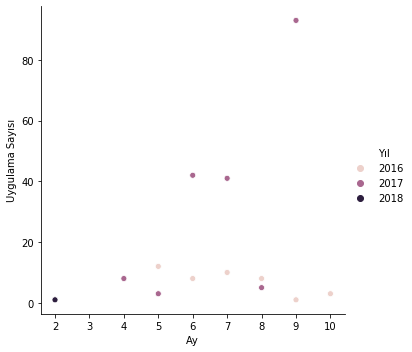

In [14]:
sns.relplot(x="Ay", y="Uygulama Sayısı",hue="Yıl", data=AYVALIK);

In [15]:
fig = px.scatter(AYVALIK, x="Ay", y="Uygulama Sayısı",size="Yıl",color='Yıl',
                 hover_name="Ay", log_x=1)
fig.show()

## 4. GÖNEN

In [16]:
is_x=data['İlçe Adı']=='GÖNEN'
GÖNEN = data[is_x]
GÖNEN

,İlçe Adı,Yıl,Ay,Uygulama Sayısı
20,GÖNEN,2017,10,3
35,GÖNEN,2017,9,1
38,GÖNEN,2017,8,242
56,GÖNEN,2017,7,317
77,GÖNEN,2017,6,158
91,GÖNEN,2017,5,86
135,GÖNEN,2016,9,93
155,GÖNEN,2016,8,778
165,GÖNEN,2016,7,538
183,GÖNEN,2016,6,514


In [165]:
fig = px.pie(GÖNEN, values='Uygulama Sayısı', names='Yıl', title='Gönen İlçesinin Yıllara Göre Yeşil Alan İlaçlama',
            hover_data=['Uygulama Sayısı'], labels={'Yıl':'Yıl'})
fig.show()
fig = px.pie(GÖNEN, values='Uygulama Sayısı', names='Ay', title='Gönen İlçesinin Aylara Göre Yeşil Alan İlaçlama',
            hover_data=['Uygulama Sayısı'], labels={'At':'Ay'})
fig.show()

* Gönen'de % 74.4 oran ile en çok ilaçlama 2016 yılında yapılmıştır.

**En çok ilaçlama yapılan aylar**

1. Ağustos

2. Temmuz

3. Haziran

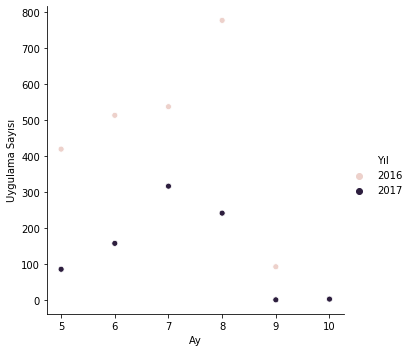

In [17]:
sns.relplot(x="Ay", y="Uygulama Sayısı",hue="Yıl",  data=GÖNEN);

In [18]:
fig = px.scatter(GÖNEN, x="Ay", y="Uygulama Sayısı",size="Yıl",color='Yıl',
                 hover_name="Ay", log_x=1)
fig.show()

              ** Bu Uygulama İle Plotly Kütüphanesinden Örnekler ile Veri Görselleştirme çalışması Yaptık **